In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
import scipy.stats

## Penentuan Jarak Gugus Galaksi Abell 2124

In [3]:
z = 0.066163
c = 300000                   # Kecepatan cahaya dalam km/s

# Parameter kosmologis
Ho = 67.4                    # Konstanta Hubble dalam km s^-1 Mpc^-1
DH = c/Ho                    # Jarak Hubble
omega_M      = 0.315         # Parameter densitas dari dark matter
omega_k      = 0             # Parameter densitas dari kurvatur
omega_lambda = 1 - omega_M   # Parameter densitas dari konstanta kosmologis 

def integral(z):
    return 1/((omega_M*(1+z)**3)+(omega_lambda))**0.5

int_z, err = quad(integral,0,z)
DC = (int_z*DH)              # Jarak Comoving
DL = (1+z)*DC                # Jarak Luminositas

print(DL)

309.01344715886273


## Penentuan Pusat Gugus Galaksi Abell 2124

In [31]:
spektro   = pd.read_csv('abell2124_dr18.csv')
spektro_c = spektro[(spektro['ra'] > 236.24) & (spektro['ra'] < 236.25) & (spektro['dec'] > 36.10) & (spektro['dec'] < 36.11)]

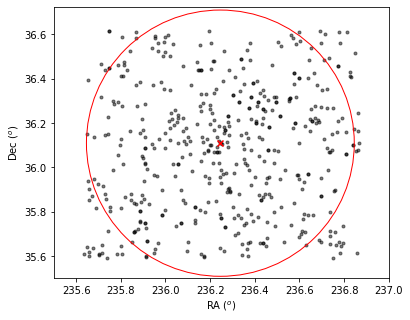

In [53]:
plt.subplots(figsize=(6, 5))
plt.scatter(spektro['ra'],spektro['dec'], color='black', marker='.', alpha=0.5)
plt.scatter(spektro_c['ra'],spektro_c['dec'], marker='x', color='red')
plt.xlabel("RA ($^o$)")
plt.ylabel("Dec ($^o$)")
circle = plt.Circle((236.24598, 36.10946), 0.6, fill=False, color='red')
plt.gca().add_patch(circle)
plt.gca().set_xlim((235.5, 237))
plt.gca().set_ylim((35.5, 36.725))
plt.show()

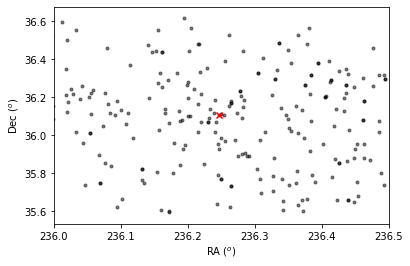

In [33]:
plt.scatter(spektro['ra'],spektro['dec'], color='black', marker='.', alpha=0.5)
plt.scatter(spektro_c['ra'],spektro_c['dec'], marker='x', color='red')
plt.xlabel("RA ($^o$)")
plt.ylabel("Dec ($^o$)")
plt.xlim(236,236.5)
#plt.title("Lokasi Pusat Gugus Galaksi Abell 2124")
plt.show()

## Plot Radius Proyeksi terhadap Kecepatan Radial

*Penjelasan trigonometri segitiga bola*

In [8]:
# Mencari Radius Proyeksi

ra_pusat  = 236.24587
dec_pusat = 36.10896

spektro['A'] = np.abs(spektro['ra'] - ra_pusat)
spektro['b'] = 90 - dec_pusat
spektro['c'] = 90 - spektro['dec']
spektro['a'] = np.arccos(np.cos(np.radians(spektro['b']))*np.cos(np.radians(spektro['c'])) + np.sin(np.radians(spektro['b']))*np.sin(np.radians(spektro['c']))*np.cos(np.radians(spektro['A'])))
spektro['R_proj'] = np.tan(spektro['a'])*DL

In [9]:
# Mencari kecepatan radial

spektro['V_rad']= 300000*spektro['z']

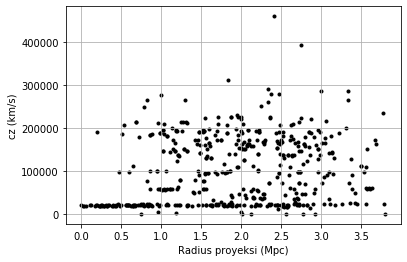

In [10]:
# Plot Radius proyeksi terhadap cz pada seluruh galaksi sampel

plt.scatter(spektro['R_proj'],spektro['V_rad'], color='black', marker= '.')
plt.xlabel("Radius proyeksi (Mpc)")
plt.ylabel("cz (km/s)")
#plt.title("Distribusi Radius Proyeksi Abell 2124")
plt.grid()
plt.show()

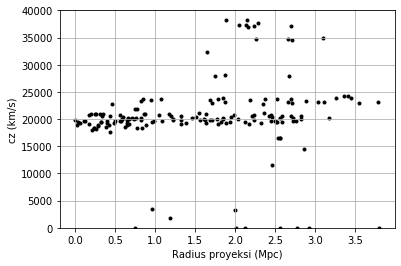

In [11]:
# Plot Radius proyeksi terhadap cz pada gugus galaksi (secara kasar)

plt.scatter(spektro['R_proj'],spektro['V_rad'], color='black', marker='.')
plt.ylim(0,40000)
plt.xlabel("Radius proyeksi (Mpc)")
plt.ylabel("cz (km/s)")
#plt.title("Distribusi Radius Proyeksi Abell 2124 Pada Redshift 0.066")
plt.grid()
plt.show()